In [133]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import color
import cv2
from statistics import mean
from sklearn.preprocessing import StandardScaler
from scipy.stats import trim_mean

In [134]:
df = pd.read_excel('../lab/LaboPython.xlsx', sheet_name='Blad2')

In [135]:
print(df)
print(df.columns)

                   Date     Hour1  CODtprimeff  CODsprimeff  TNprimeff  \
0   2023-09-27 00:00:00       NaN        244.5        119.5      47.10   
1   2023-10-04 00:00:00       NaN        263.5        134.0      34.65   
2   2023-10-11 00:00:00       NaN        245.0        154.0      38.75   
3   2023-10-13 00:00:00  11:00:00          NaN          NaN        NaN   
4   2023-10-16 00:00:00  10:15:00          NaN          NaN      42.10   
..                  ...       ...          ...          ...        ...   
176 2025-03-12 00:00:00  12:24:00        265.0        146.0      42.20   
177 2025-03-13 10:12:00  10:12:00          NaN          NaN        NaN   
178 2025-03-19 00:00:00  12:00:00        191.5         89.5      43.90   
179 2025-03-26 00:00:00  12:20:00        221.0        100.5      36.45   
180 2025-04-02 00:00:00  12:30:00        256.5        122.5      35.80   

     NH4primeff  CODseff   TNeff  NH4eff  NO2eff  NO3eff     Hour2  \
0          37.3     12.5   9.430   0.256 

In [136]:
# Controleer of 'Date' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])

# Haal de datum uit de 'Time' kolom (zonder tijdcomponent)
df['Date'] = pd.to_datetime(df['Date'].dt.date)

print(df['Date'].dtype)

datetime64[ns]


In [137]:
# Selecteer alleen numerieke kolommen
numeric_cols = df.select_dtypes(include='number').columns

# Groepeer en neem het gemiddelde, behoud de 'Date' kolom
grouped = df.groupby('Date')[numeric_cols]
counts = grouped.count()
means = grouped.mean()

# Behoud gemiddelden indien minstens 1 waarde, anders NaN
final_df = means.where(counts >= 1)

# Zorg ervoor dat 'Date' behouden blijft als index
final_df = final_df.reset_index()  # Dit zal 'Date' weer als kolom toevoegen

# Zet final_df['Date'] expliciet om naar datetime64[ns]
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [97]:
print(final_df.shape)

(170, 16)


In [138]:
temp_basin4 = pd.read_csv('../sensor_data/temp_basin4.csv')

# Controleer of 'Time' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(temp_basin4['Time']):
    temp_basin4['Time'] = pd.to_datetime(temp_basin4['Time'])

# Haal de datum uit de 'Time' kolom (zonder tijdcomponent)
temp_basin4['Date'] = pd.to_datetime(temp_basin4['Time'].dt.date)

temp_basin4 = temp_basin4[temp_basin4['Date'] >= '2023-10-25']

temp_basin4 = temp_basin4.dropna()
temp_basin4 = temp_basin4[temp_basin4['temp_basin4'] != 0]
temp_basin4 = temp_basin4[temp_basin4['temp_basin4'] < 30]

rolling_median = temp_basin4['temp_basin4'].rolling(window=300, center=True).median()
diff = np.abs(temp_basin4['temp_basin4'] - rolling_median)
threshold = 2
temp_basin4 = temp_basin4[diff < threshold]

# Bereken het gemiddelde van 'temp_basin4' voor elke datum
gem_dagelijks_temp = temp_basin4.groupby('Date')['temp_basin4'].mean().reset_index()

In [139]:
# Laad CSV-bestand
DO_basin4 = pd.read_csv("../sensor_data/DO_basin4.csv")

# Controleer of 'Time' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(DO_basin4['Time']):
    DO_basin4['Time'] = pd.to_datetime(DO_basin4['Time'])

# Haal de datum uit de 'Time' kolom (zonder tijdcomponent)
DO_basin4['Date'] = pd.to_datetime(DO_basin4['Time'].dt.date)

DO_basin4 = DO_basin4[DO_basin4['Date'] >= '2023-10-25']

# 0-waarden
DO_basin4 = DO_basin4.dropna()
DO_basin4 = DO_basin4[DO_basin4['DO_basin4'] != 0]
DO_basin4 = DO_basin4[DO_basin4['DO_basin4'] < 3.5]

rolling_median = DO_basin4['DO_basin4'].rolling(window=150, center=True).median()
diff = np.abs(DO_basin4['DO_basin4'] - rolling_median)
threshold = 0.5
DO_basin4 = DO_basin4[diff < threshold]

def trimmed_daily_mean(values, proportion_to_cut=0.00000005):
    return trim_mean(values, proportiontocut=proportion_to_cut)

# Pas deze functie toe in je groupby
gem_dagelijks_DO4 = DO_basin4.groupby('Date')['DO_basin4'].apply(trimmed_daily_mean).reset_index()

In [140]:
# Laad CSV-bestand
DO_basin5 = pd.read_csv("../sensor_data/DO_basin5.csv")

# Controleer of 'Time' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(DO_basin5['Time']):
    DO_basin5['Time'] = pd.to_datetime(DO_basin5['Time'])

# Haal de datum uit de 'Time' kolom (zonder tijdcomponent)
DO_basin5['Date'] = pd.to_datetime(DO_basin5['Time'].dt.date)

DO_basin5 = DO_basin5[DO_basin5['Date'] >= '2023-10-25']

# 0-waarden
DO_basin5 = DO_basin5.dropna()
DO_basin5 = DO_basin5[DO_basin5['DO_basin5'] != 0]
DO_basin5 = DO_basin5[DO_basin5['DO_basin5'] < 3.5]

rolling_median = DO_basin5['DO_basin5'].rolling(window=150, center=True).median()
diff = np.abs(DO_basin5['DO_basin5'] - rolling_median)
threshold = 0.5
DO_basin5 = DO_basin5[diff < threshold]

def trimmed_daily_mean(values, proportion_to_cut=0.00000005):
    return trim_mean(values, proportiontocut=proportion_to_cut)

# Pas deze functie toe in je groupby
gem_dagelijks_DO5 = DO_basin5.groupby('Date')['DO_basin5'].apply(trimmed_daily_mean).reset_index()

print(gem_dagelijks_DO5.iloc[350:380])

          Date  DO_basin5
350 2024-10-20   1.999586
351 2024-10-21   2.008511
352 2024-10-22   2.011944
353 2024-10-23   2.017019
354 2024-10-24   1.814014
355 2024-10-25   2.003435
356 2024-10-26   2.004051
357 2024-10-27   2.001742
358 2024-10-28   1.998296
359 2024-10-29   1.926760
360 2024-11-01   1.013344
361 2024-11-02   0.997156
362 2024-11-03   1.000545
363 2024-11-04   1.006816
364 2024-11-05   1.003914
365 2024-11-06   0.992648
366 2024-11-07   1.000445
367 2024-11-08   0.999360
368 2024-11-09   1.003251
369 2024-11-10   1.000227
370 2024-11-11   1.006595
371 2024-11-12   1.000970
372 2024-11-14   0.965636
373 2024-11-15   0.989355
374 2024-11-16   1.001958
375 2024-11-17   0.993764
376 2024-11-18   1.001992
377 2024-11-19   0.999781
378 2024-11-20   0.983670
379 2024-11-21   0.987588


In [141]:
import pandas as pd
from datetime import timedelta

# Laad CSV en parse Time als datetime
flowrate_basin = pd.read_csv("../sensor_data/flowrate_basin.csv", parse_dates=["Time"])

# Controleer of 'Time' kolom datetime is, anders omzetten
if not pd.api.types.is_datetime64_any_dtype(flowrate_basin['Time']):
    flowrate_basin['Time'] = pd.to_datetime(flowrate_basin['Time'])

# Haal de datum uit de 'Time' kolom (zonder tijdcomponent)
flowrate_basin['Date'] = pd.to_datetime(flowrate_basin['Time'].dt.date)

flowrate_basin = flowrate_basin[flowrate_basin['Date'] >= '2023-10-25']

# Verwijder NaN en extreme waarden
flowrate_basin = flowrate_basin.dropna(subset=['flowrate_basin'])
rolling_median = flowrate_basin['flowrate_basin'].rolling(window=700, center=True).median()
diff = (flowrate_basin['flowrate_basin'] - rolling_median).abs()
flowrate_basin = flowrate_basin[diff < 0.1]

# Groepeer op dag (gemiddelde flow per dag)
daggemiddelden = flowrate_basin.groupby('Date')['flowrate_basin'].mean().reset_index()

# Maak 'Week' kolom op maat:
cutoff = pd.to_datetime("2023-10-30")
daggemiddelden['Week'] = daggemiddelden['Date'].apply(
    lambda d: pd.Timestamp("2023-10-25") if d < cutoff else d - timedelta(days=d.weekday())
)

# Bereken gemiddelde per 'Week'
weekgemiddelden = daggemiddelden.groupby('Week')['flowrate_basin'].mean().reset_index()
weekgemiddelden.rename(columns={'flowrate_basin': 'weekly_flowrate'}, inplace=True)

# Merge terug op 'Week' zodat elke dag zijn weekgemiddelde krijgt
daggemiddelden = daggemiddelden.merge(weekgemiddelden, on='Week', how='left')

# Resultaat
gem_dagelijks_flowrate = daggemiddelden[['Date', 'weekly_flowrate']]
print(gem_dagelijks_flowrate.iloc[370:380])


          Date  weekly_flowrate
370 2024-10-29         0.499995
371 2024-11-01         0.499995
372 2024-11-02         0.499995
373 2024-11-03         0.499995
374 2024-11-04         0.500089
375 2024-11-05         0.500089
376 2024-11-06         0.500089
377 2024-11-07         0.500089
378 2024-11-08         0.500089
379 2024-11-09         0.500089


In [142]:
# Bepaal de volledige datumbereik
start_datum = min(
    temp_basin4['Date'].min(),
    DO_basin4['Date'].min(),
    DO_basin5['Date'].min(),
    flowrate_basin['Date'].min()
)

eind_datum = max(
    temp_basin4['Date'].max(),
    DO_basin4['Date'].max(),
    DO_basin5['Date'].max(),
    flowrate_basin['Date'].max()
)

# Maak volledige lijst met alle kalenderdatums tussen start en einde
alle_datums = pd.date_range(start=start_datum, end=eind_datum, freq='D')

alle_datums_df = pd.DataFrame({'Date': alle_datums})

# Start merged_df met alle datums
merged_df = alle_datums_df.copy()

# Voeg temperatuur en DO toe
merged_df = pd.merge(merged_df, gem_dagelijks_temp, on='Date', how='left')
merged_df = pd.merge(merged_df, gem_dagelijks_DO4, on='Date', how='left')
merged_df = pd.merge(merged_df, gem_dagelijks_DO5, on='Date', how='left')
merged_df = pd.merge(merged_df, gem_dagelijks_flowrate, on='Date', how='left')

# Voeg eventueel extra info toe uit final_df
merged_df = pd.merge(merged_df, final_df, on='Date', how='left')
print(merged_df.shape)
print(merged_df.tail(10))

(524, 20)
          Date  temp_basin4  DO_basin4  DO_basin5  weekly_flowrate  \
514 2025-03-22    18.915425   1.000595   0.472209              NaN   
515 2025-03-23    18.685726   0.998880   0.276632              NaN   
516 2025-03-24    18.550182   0.988695   0.769014              NaN   
517 2025-03-25    18.733170   0.999407   0.583344              NaN   
518 2025-03-26    18.528098   0.746559   0.554338              NaN   
519 2025-03-27    19.012937   0.499301   0.626132              NaN   
520 2025-03-28    19.124549   0.432016   0.690101              NaN   
521 2025-03-29    18.937563   0.332674   0.710648              NaN   
522 2025-03-30    19.251656   0.313242   0.723626              NaN   
523 2025-03-31    18.924257   0.346291   0.928501              NaN   

     CODtprimeff  CODsprimeff  TNprimeff  NH4primeff  CODseff  TNeff  NH4eff  \
514          NaN          NaN        NaN         NaN      NaN    NaN     NaN   
515          NaN          NaN        NaN         NaN      N

In [143]:
# Laad het CSV-bestand
CODs_influent_2024 = pd.read_csv("../sensor_data/CODs_influent.csv", parse_dates=["Time"])

# Zorg dat 'Time' een datetime64-kolom is
if not pd.api.types.is_datetime64_any_dtype(CODs_influent_2024['Time']):
    CODs_influent_2024['Time'] = pd.to_datetime(CODs_influent_2024['Time'])

# Haal juiste kolomnaam op
naam_kolom = CODs_influent_2024.columns[1]  # bijv. 'CODs_influent'

# Zet 'Time' als index voor resampling
CODs_influent_2024 = CODs_influent_2024.set_index('Time')

# Dagelijks gemiddelde berekenen
CODs_influent_2024 = CODs_influent_2024.resample("D").mean()

# Index terug naar kolom
CODs_influent_2024 = CODs_influent_2024.reset_index()

# Filter op geldige waarden (niet 0, kleiner dan 1500)
CODs_influent_2024 = CODs_influent_2024[CODs_influent_2024[naam_kolom] != 0]
CODs_influent_2024 = CODs_influent_2024[CODs_influent_2024[naam_kolom] < 400]

# Filter op jaar 2024
CODs_influent_2024 = CODs_influent_2024[
    (CODs_influent_2024["Time"] >= "2024-04-20") & 
    (CODs_influent_2024["Time"] < "2024-07-31")
]

In [144]:
print(CODs_influent_2024.head())

          Time  CODs_influent
164 2024-04-20     135.023333
165 2024-04-21     135.181528
166 2024-04-22     123.298056
167 2024-04-23     127.523611
168 2024-04-24     130.009722


In [145]:
# Maak backup-kolom van de originele CODsprimeff-waarden
merged_df["CODsprimeff_orig"] = merged_df["CODsprimeff"]

# Zorg dat de 'Time'-kolom datetime64 is
CODs_influent_2024["Time"] = pd.to_datetime(CODs_influent_2024["Time"])
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Merge enkel CODs_sensor op datum
merged_df = merged_df.merge(
    CODs_influent_2024.rename(columns={CODs_influent_2024.columns[1]: "CODs_sensor"}),
    how="left",
    left_on="Date",
    right_on="Time"
).drop(columns="Time")

# Definieer masker voor gewenste sensorperiode
mask_sensorperiode = (merged_df["Date"] >= "2024-04-20") & (merged_df["Date"] < "2024-07-31")

# Vervang enkel CODsprimeff binnen de sensorperiode waar sensorwaarde niet NaN is
merged_df.loc[
    mask_sensorperiode & merged_df["CODs_sensor"].notna(),
    "CODsprimeff"
] = merged_df.loc[
    mask_sensorperiode & merged_df["CODs_sensor"].notna(),
    "CODs_sensor"
]

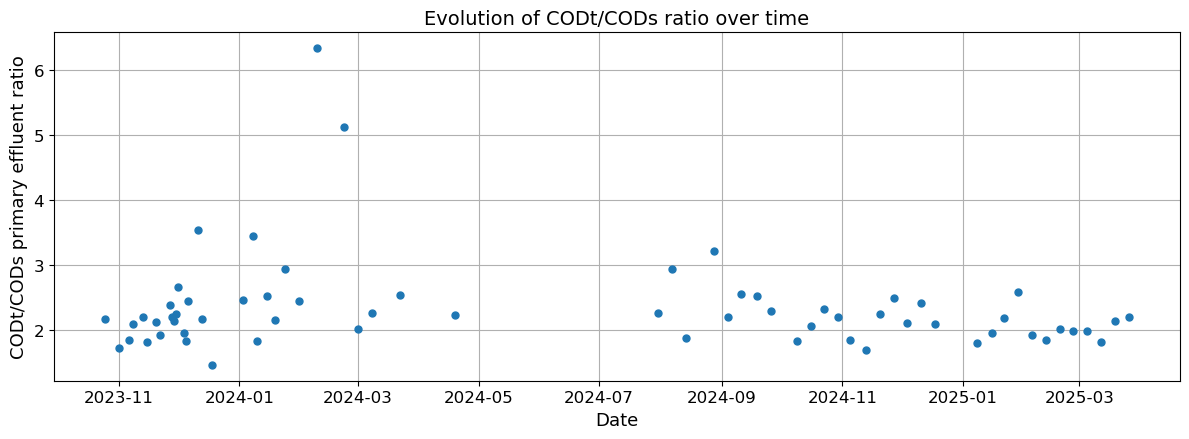

In [146]:
# Voeg een nieuwe kolom toe met de ratio
merged_df['CODt_CODs_ratio_lab'] = merged_df['CODtprimeff'] / merged_df['CODsprimeff_orig']

plt.figure(figsize=(12, 4.5))  # Brede figuur met iets minder hoogte

plt.plot(merged_df['Date'], merged_df['CODt_CODs_ratio_lab'], marker='o', linestyle='None', markersize=5)

plt.xlabel('Date', fontsize=13)
plt.ylabel('CODt/CODs primary effluent ratio', fontsize=13)
plt.title('Evolution of CODt/CODs ratio over time', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()


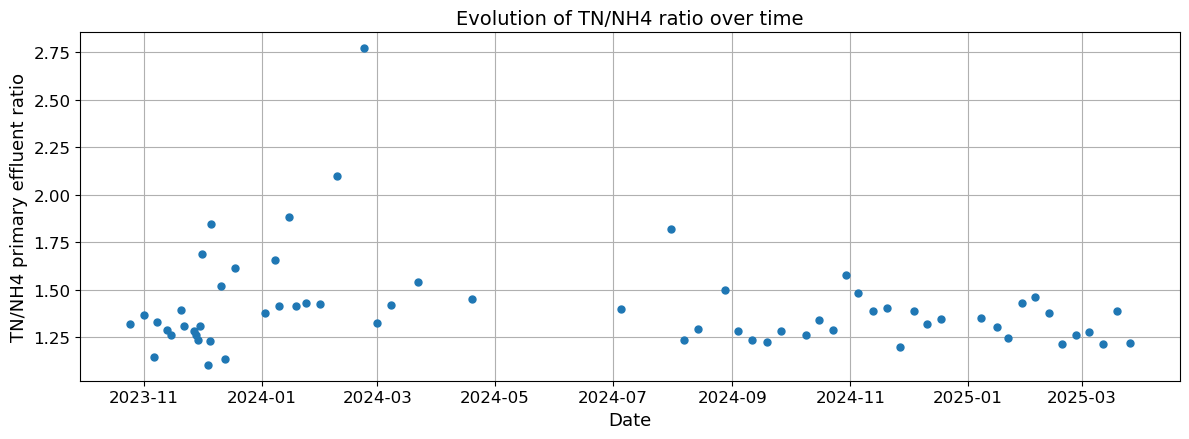

In [147]:
merged_df['TN_NH4_ratio_lab'] = merged_df['TNprimeff'] / merged_df['NH4primeff']


plt.figure(figsize=(12, 4.5))  # Brede figuur met iets minder hoogte

plt.plot(merged_df['Date'], merged_df['TN_NH4_ratio_lab'], marker='o', linestyle='None', markersize=5)

plt.xlabel('Date', fontsize=13)
plt.ylabel('TN/NH4 primary effluent ratio', fontsize=13)
plt.title('Evolution of TN/NH4 ratio over time', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

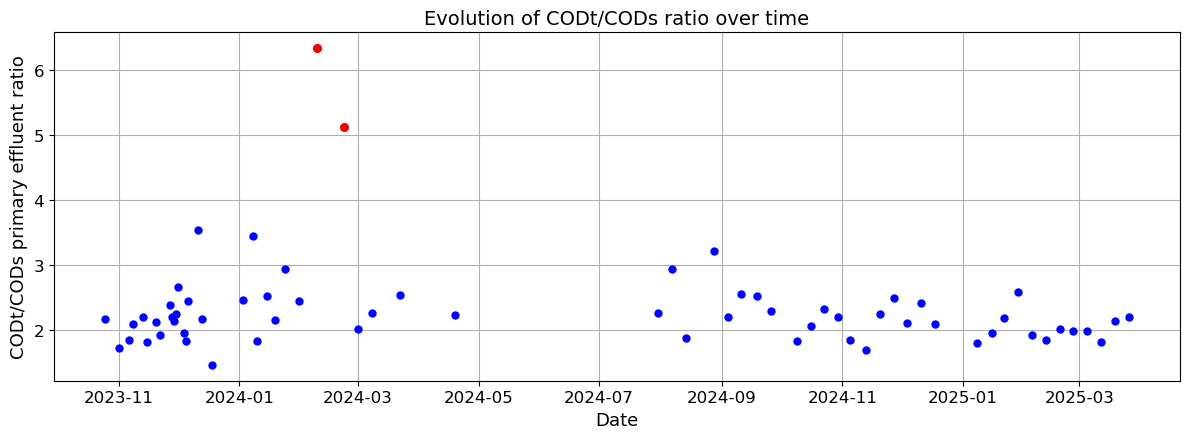

In [148]:
plt.figure(figsize=(12, 4.5))

# Plot alle punten in het blauw
plt.plot(merged_df['Date'], merged_df['CODt_CODs_ratio_lab'], marker='o', linestyle='None', markersize=5, color='blue')

# Zoek de indices van de twee hoogste waarden
top2_indices = merged_df['CODt_CODs_ratio_lab'].nlargest(2).index

# Plot de twee hoogste waarden opnieuw in het rood
plt.scatter(merged_df.loc[top2_indices, 'Date'],
            merged_df.loc[top2_indices, 'CODt_CODs_ratio_lab'],
            color='red', s=30, label='Top 2 values', zorder=3)

plt.xlabel('Date', fontsize=13)
plt.ylabel('CODt/CODs primary effluent ratio', fontsize=13)
plt.title('Evolution of CODt/CODs ratio over time', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [150]:
# 1. Bereken gemiddelde ratio van de correcte (niet-foute) punten
mean_ratio = merged_df['CODt_CODs_ratio_lab'].mean()
std_ratio = merged_df['CODt_CODs_ratio_lab'].std()
threshold = 3

# 2. Detecteer de outliers
mask_outliers = (
    (merged_df['CODt_CODs_ratio_lab'] > mean_ratio + threshold * std_ratio) |
    (merged_df['CODt_CODs_ratio_lab'] < mean_ratio - threshold * std_ratio)
)

combined_mask = mask_outliers | mask_sensorperiode  # let op: OF, dus beide inbegrepen

# 3. Herbereken CODtprimeff voor de outliers
# Gebruik de CODsprimeff en de gemiddelde ratio
merged_df.loc[combined_mask, 'CODtprimeff'] = merged_df.loc[combined_mask, 'CODsprimeff'] * mean_ratio

# Nieuw masker: waar CODtprimeff ontbreekt maar CODsprimeff wél beschikbaar is
mask_codt_missing = merged_df['CODtprimeff'].isna() & merged_df['CODsprimeff'].notna()

# Herbereken CODtprimeff voor deze gevallen
merged_df.loc[mask_codt_missing, 'CODtprimeff'] = merged_df.loc[mask_codt_missing, 'CODsprimeff'] * mean_ratio

print(mean_ratio)

2.328040905583806


In [151]:
print(mask_codt_missing.any())
print(mask_codt_missing.sum())
print(merged_df[mask_codt_missing][['Date', 'CODtprimeff', 'CODsprimeff']])


False
0
Empty DataFrame
Columns: [Date, CODtprimeff, CODsprimeff]
Index: []


In [152]:
# 1. Bereken gemiddelde en standaardafwijking van de TN/NH4-ratio
mean_ratio_tn = merged_df['TN_NH4_ratio_lab'].mean()
std_ratio_tn = merged_df['TN_NH4_ratio_lab'].std()
threshold = 3  # of een andere waarde als je strenger of losser wilt zijn

# 2. Maak het masker van outliers
mask_outliers_tn = (
    (merged_df['TN_NH4_ratio_lab'] > mean_ratio_tn + threshold * std_ratio_tn) |
    (merged_df['TN_NH4_ratio_lab'] < mean_ratio_tn - threshold * std_ratio_tn)
)

# 3. Bekijk de rijen die als outlier worden aangeduid
outliers_tn = merged_df[mask_outliers_tn]

# 4. Print of bekijk de relevante kolommen
print(outliers_tn[['Date', 'TNprimeff', 'NH4primeff', 'TN_NH4_ratio_lab']])

# 5. Herbereken TNprimeff op basis van de gemiddelde TN/NH4-ratio
merged_df.loc[mask_outliers_tn, 'TNprimeff'] = merged_df.loc[mask_outliers_tn, 'NH4primeff'] * mean_ratio_tn

# Extra masker: TNprimeff ontbreekt maar NH4primeff is wel beschikbaar
mask_tn_missing = merged_df['TNprimeff'].isna() & merged_df['NH4primeff'].notna()

# Herbereken TNprimeff op basis van NH4primeff en gemiddelde ratio
merged_df.loc[mask_tn_missing, 'TNprimeff'] = merged_df.loc[mask_tn_missing, 'NH4primeff'] * mean_ratio_tn

print(mask_tn_missing.any())
print(mask_tn_missing.sum())
print(merged_df[mask_tn_missing][['Date', 'TNprimeff', 'NH4primeff']])
print(mean_ratio_tn)

          Date  TNprimeff  NH4primeff  TN_NH4_ratio_lab
121 2024-02-23      64.85        23.4          2.771368
True
9
          Date  TNprimeff  NH4primeff
233 2024-06-14  36.083675      25.700
251 2024-07-02  44.929090      32.000
289 2024-08-09  19.516073      13.900
296 2024-08-16  30.888749      22.000
343 2024-10-02  50.966436      36.300
475 2025-02-11  42.015719      29.925
477 2025-02-13  44.191972      31.475
481 2025-02-17  47.456351      33.800
482 2025-02-18  43.630358      31.075
1.4040340627083123


In [153]:
# 1. Lees de lijst met unieke afbeeldingsdatums in
image_dates_df = pd.read_csv("unique_microscope_image_dates.csv")
image_dates_df['Date'] = pd.to_datetime(image_dates_df['Date'])

# 2. Zorg dat 'Date' datetime is en zet als index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df = merged_df.set_index('Date')

# 3. Interpoleer eerst op volledige tijdreeks (voor alle datums)
cols_to_interpolate = merged_df.columns.difference(['Qwaste'])
merged_df[cols_to_interpolate] = merged_df[cols_to_interpolate].interpolate(method='time', limit_direction='both')

# 4. Qwaste forward-fillen
merged_df['Qwaste'] = merged_df['Qwaste'].ffill()

# 5. Reset index
merged_df = merged_df.reset_index()

# 6. Filter enkel de datums uit de image dataset
merged_df = merged_df[merged_df['Date'].isin(image_dates_df['Date'])].reset_index(drop=True)

In [154]:
print(merged_df.shape)

(87, 24)


In [155]:
merged_df['weekly_flowrate'] = merged_df['weekly_flowrate']*1000*24
merged_df['Qeffluent']= merged_df['weekly_flowrate']
merged_df['SRT'] = (merged_df['MLSSbasin3']*1080 + merged_df['MLSSbasin45']*1080 + merged_df['MLSSbasin45']*1940)/(merged_df['MLSSRAS']*merged_df['Qwaste']+ merged_df['TSSeff']*merged_df['Qeffluent'])
merged_df['bCODutil']= 0.85*merged_df['CODtprimeff']-merged_df['CODseff']
merged_df['NOxinit']= merged_df['NH4primeff']-merged_df['NH4eff']
merged_df['bHt'] = 0.12*1.04**(merged_df['temp_basin4']-20)
merged_df['bNt'] = 0.17*1.029**(merged_df['temp_basin4']-20)
merged_df['Pxbio'] = (merged_df['weekly_flowrate']*0.45*merged_df['bCODutil'])/(1+merged_df['bHt']*merged_df['SRT'])+(merged_df['weekly_flowrate']*0.15*merged_df['NOxinit'])/(1+merged_df['bNt']*merged_df['SRT'])+(0.15*merged_df['bHt']*merged_df['weekly_flowrate']*merged_df['bCODutil']*merged_df['SRT'])/(1+merged_df['bHt']*merged_df['SRT'])
merged_df['NOxiter1'] = merged_df['TNprimeff']-merged_df['NH4eff']-0.12*merged_df['Pxbio']/merged_df['weekly_flowrate']
merged_df['Pxbioiter1']= (merged_df['weekly_flowrate']*0.45*merged_df['bCODutil'])/(1+merged_df['bHt']*merged_df['SRT'])+(merged_df['weekly_flowrate']*0.15*merged_df['NOxiter1'])/(1+merged_df['bNt']*merged_df['SRT'])+(0.15*merged_df['bHt']*merged_df['weekly_flowrate']*merged_df['bCODutil']*merged_df['SRT'])/(1+merged_df['bHt']*merged_df['SRT'])
merged_df['NOxiter2'] = merged_df['TNprimeff']-merged_df['NH4eff']-0.12*merged_df['Pxbioiter1']/merged_df['weekly_flowrate']
merged_df['Pxbioiter2']= (merged_df['weekly_flowrate']*0.45*merged_df['bCODutil'])/(1+merged_df['bHt']*merged_df['SRT'])+(merged_df['weekly_flowrate']*0.15*merged_df['NOxiter2'])/(1+merged_df['bNt']*merged_df['SRT'])+(0.15*merged_df['bHt']*merged_df['weekly_flowrate']*merged_df['bCODutil']*merged_df['SRT'])/(1+merged_df['bHt']*merged_df['SRT'])
merged_df['R0'] = merged_df['weekly_flowrate']* merged_df['bCODutil']+4.57*merged_df['weekly_flowrate']*merged_df['NOxiter2']-1.42*merged_df['Pxbioiter2']
merged_df['Henryatm'] = 10**(-595.27/(273.15+merged_df['temp_basin4'])+6.644)
merged_df['xg']= 0.21/merged_df['Henryatm']
merged_df['DOsat']=merged_df['xg']*55.6*32*1000
merged_df['kLa'] = (merged_df['R0']+merged_df['weekly_flowrate']*merged_df['DO_basin5'])/(1080*(merged_df['DOsat']-merged_df['DO_basin4'])+1940*(merged_df['DOsat']-merged_df['DO_basin5']))
merged_df['kLa (1/h)'] = merged_df['kLa']/24
merged_df['teller']= (merged_df['R0']+merged_df['weekly_flowrate']*merged_df['DO_basin5'])/24
merged_df['noemer']= 1080*(merged_df['DOsat']-merged_df['DO_basin4'])+1940*(merged_df['DOsat']-merged_df['DO_basin5'])
merged_df['O2-demand-COD']=merged_df['weekly_flowrate']* merged_df['bCODutil']
merged_df['O2-demand-NOx']=4.57*merged_df['weekly_flowrate']*merged_df['NOxiter2']
merged_df['O2-demand-Pxbio']=-1.42*merged_df['Pxbioiter2']
print(merged_df['Date'],merged_df['kLa (1/h)'])
print(merged_df.shape)

0    2023-10-26
1    2023-10-30
2    2023-11-02
3    2023-11-06
4    2023-11-09
        ...    
82   2025-02-12
83   2025-02-13
84   2025-02-17
85   2025-02-18
86   2025-02-19
Name: Date, Length: 87, dtype: datetime64[ns] 0     4.240522
1     4.001428
2     3.975218
3     4.504022
4     2.670909
        ...   
82    3.716854
83    4.826790
84    5.604216
85    5.153678
86    4.901507
Name: kLa (1/h), Length: 87, dtype: float64
(87, 46)


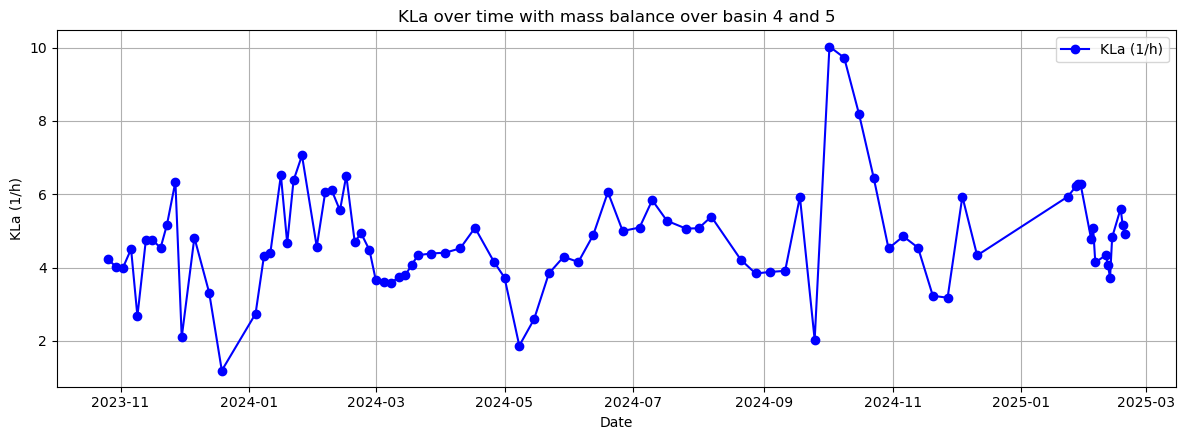

In [156]:
# Zorg dat 'Date' een datetime-object is voor correcte as
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sorteer op datum (indien nodig)
merged_df = merged_df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 4.5))
plt.plot(merged_df['Date'], merged_df['kLa (1/h)'], marker='o', linestyle='-', color='blue', label='KLa (1/h)')

plt.xlabel('Date')
plt.ylabel('KLa (1/h)')
plt.title('KLa over time with mass balance over basin 4 and 5')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Sla op als PDF
plt.savefig("KLa2tankstitel.pdf", format='pdf', bbox_inches='tight')

plt.show()

/var/folders/9f/th88wdx51hg0ndwms7rmbwbm0000gn/T/ipykernel_38643/3587252621.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis", len(scenarios))


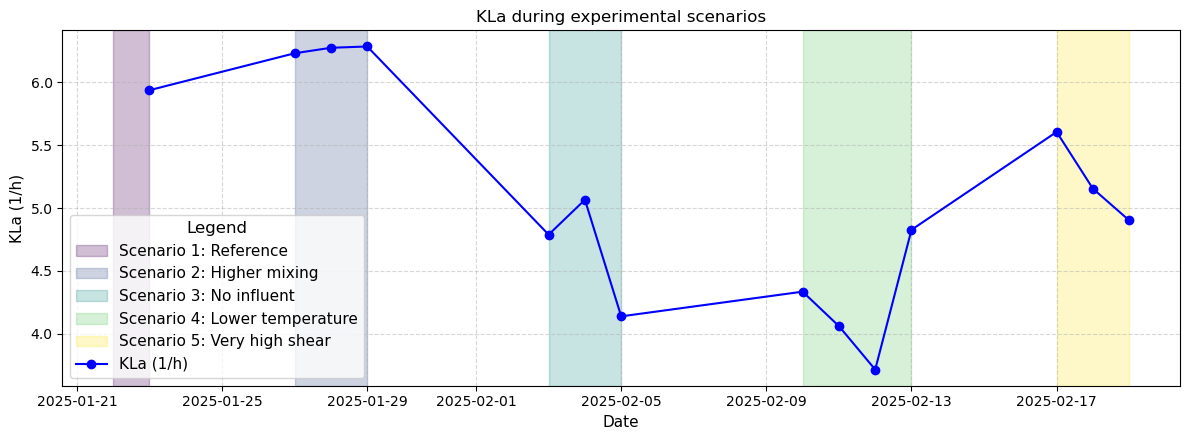

In [157]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import pandas as pd

# Zorg dat 'Date' een datetime is
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Filter gewenste periode
mask = (merged_df['Date'] >= '2025-01-22') & (merged_df['Date'] <= '2025-02-19')
filtered_df = merged_df.loc[mask]

# Scenario's met uitleg
scenarios = [
    ("2025-01-22", "2025-01-23", "Scenario 1: Reference"),
    ("2025-01-27", "2025-01-29", "Scenario 2: Higher mixing"),
    ("2025-02-03", "2025-02-05", "Scenario 3: No influent"),
    ("2025-02-10", "2025-02-13", "Scenario 4: Lower temperature"),
    ("2025-02-17", "2025-02-19", "Scenario 5: Very high shear")
]

# Viridis-kleuren genereren
viridis = cm.get_cmap("viridis", len(scenarios))

# Plot starten
fig, ax = plt.subplots(figsize=(12, 4.5))

# Achtergrond scenario-kleuren
for i, (start, end, label) in enumerate(scenarios):
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), 
               color=viridis(i), alpha=0.25, label=label)

# Data plotten
ax.plot(filtered_df['Date'], filtered_df['kLa (1/h)'], 
        marker='o', linestyle='-', color='blue', label='KLa (1/h)', zorder=10)

# Asopmaak
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('KLa (1/h)', fontsize=11)
ax.set_title('KLa during experimental scenarios')
ax.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Legende
ax.legend(loc='lower left', fontsize=11, title='Legend', title_fontsize=12)
plt.tight_layout()

# Opslaan als PDF
plt.savefig("KLa_with_scenarios_labeled.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [158]:
# Selecteer enkel de 'Date' en 'kLa/h' kolommen
kla_df = merged_df[['Date', 'kLa (1/h)']]

# Schrijf naar CSV
kla_df.to_csv('kla_values_2tanksincludingCODssensor.csv', index=False)

merged_df.to_csv('merged_df_influentdata.csv', index=False)

Aantal hoge waarden: 5
Aantal lage waarden: 5

--- Vergelijking van invoervariabelen ---


,Gemiddeld_hoog,Gemiddeld_laag,Ratio_hoog/laag
weekly_flowrate,1.151813e+04,1.200534e+04,0.959418
bCODutil,2.611912e+02,7.714578e+01,3.385683
NOxiter2,3.867447e+01,9.468032e+00,4.084742
Pxbioiter1,7.616904e+05,2.867616e+05,2.656179
R0,3.969237e+06,1.038537e+06,3.821949
DOsat,8.979888e+00,9.061410e+00,0.991003
DO_basin4,2.246080e+00,1.455488e+00,1.543180
temp_basin4,2.093836e+01,2.036489e+01,1.028160
SRT,4.621360e+01,1.094067e+01,4.224018


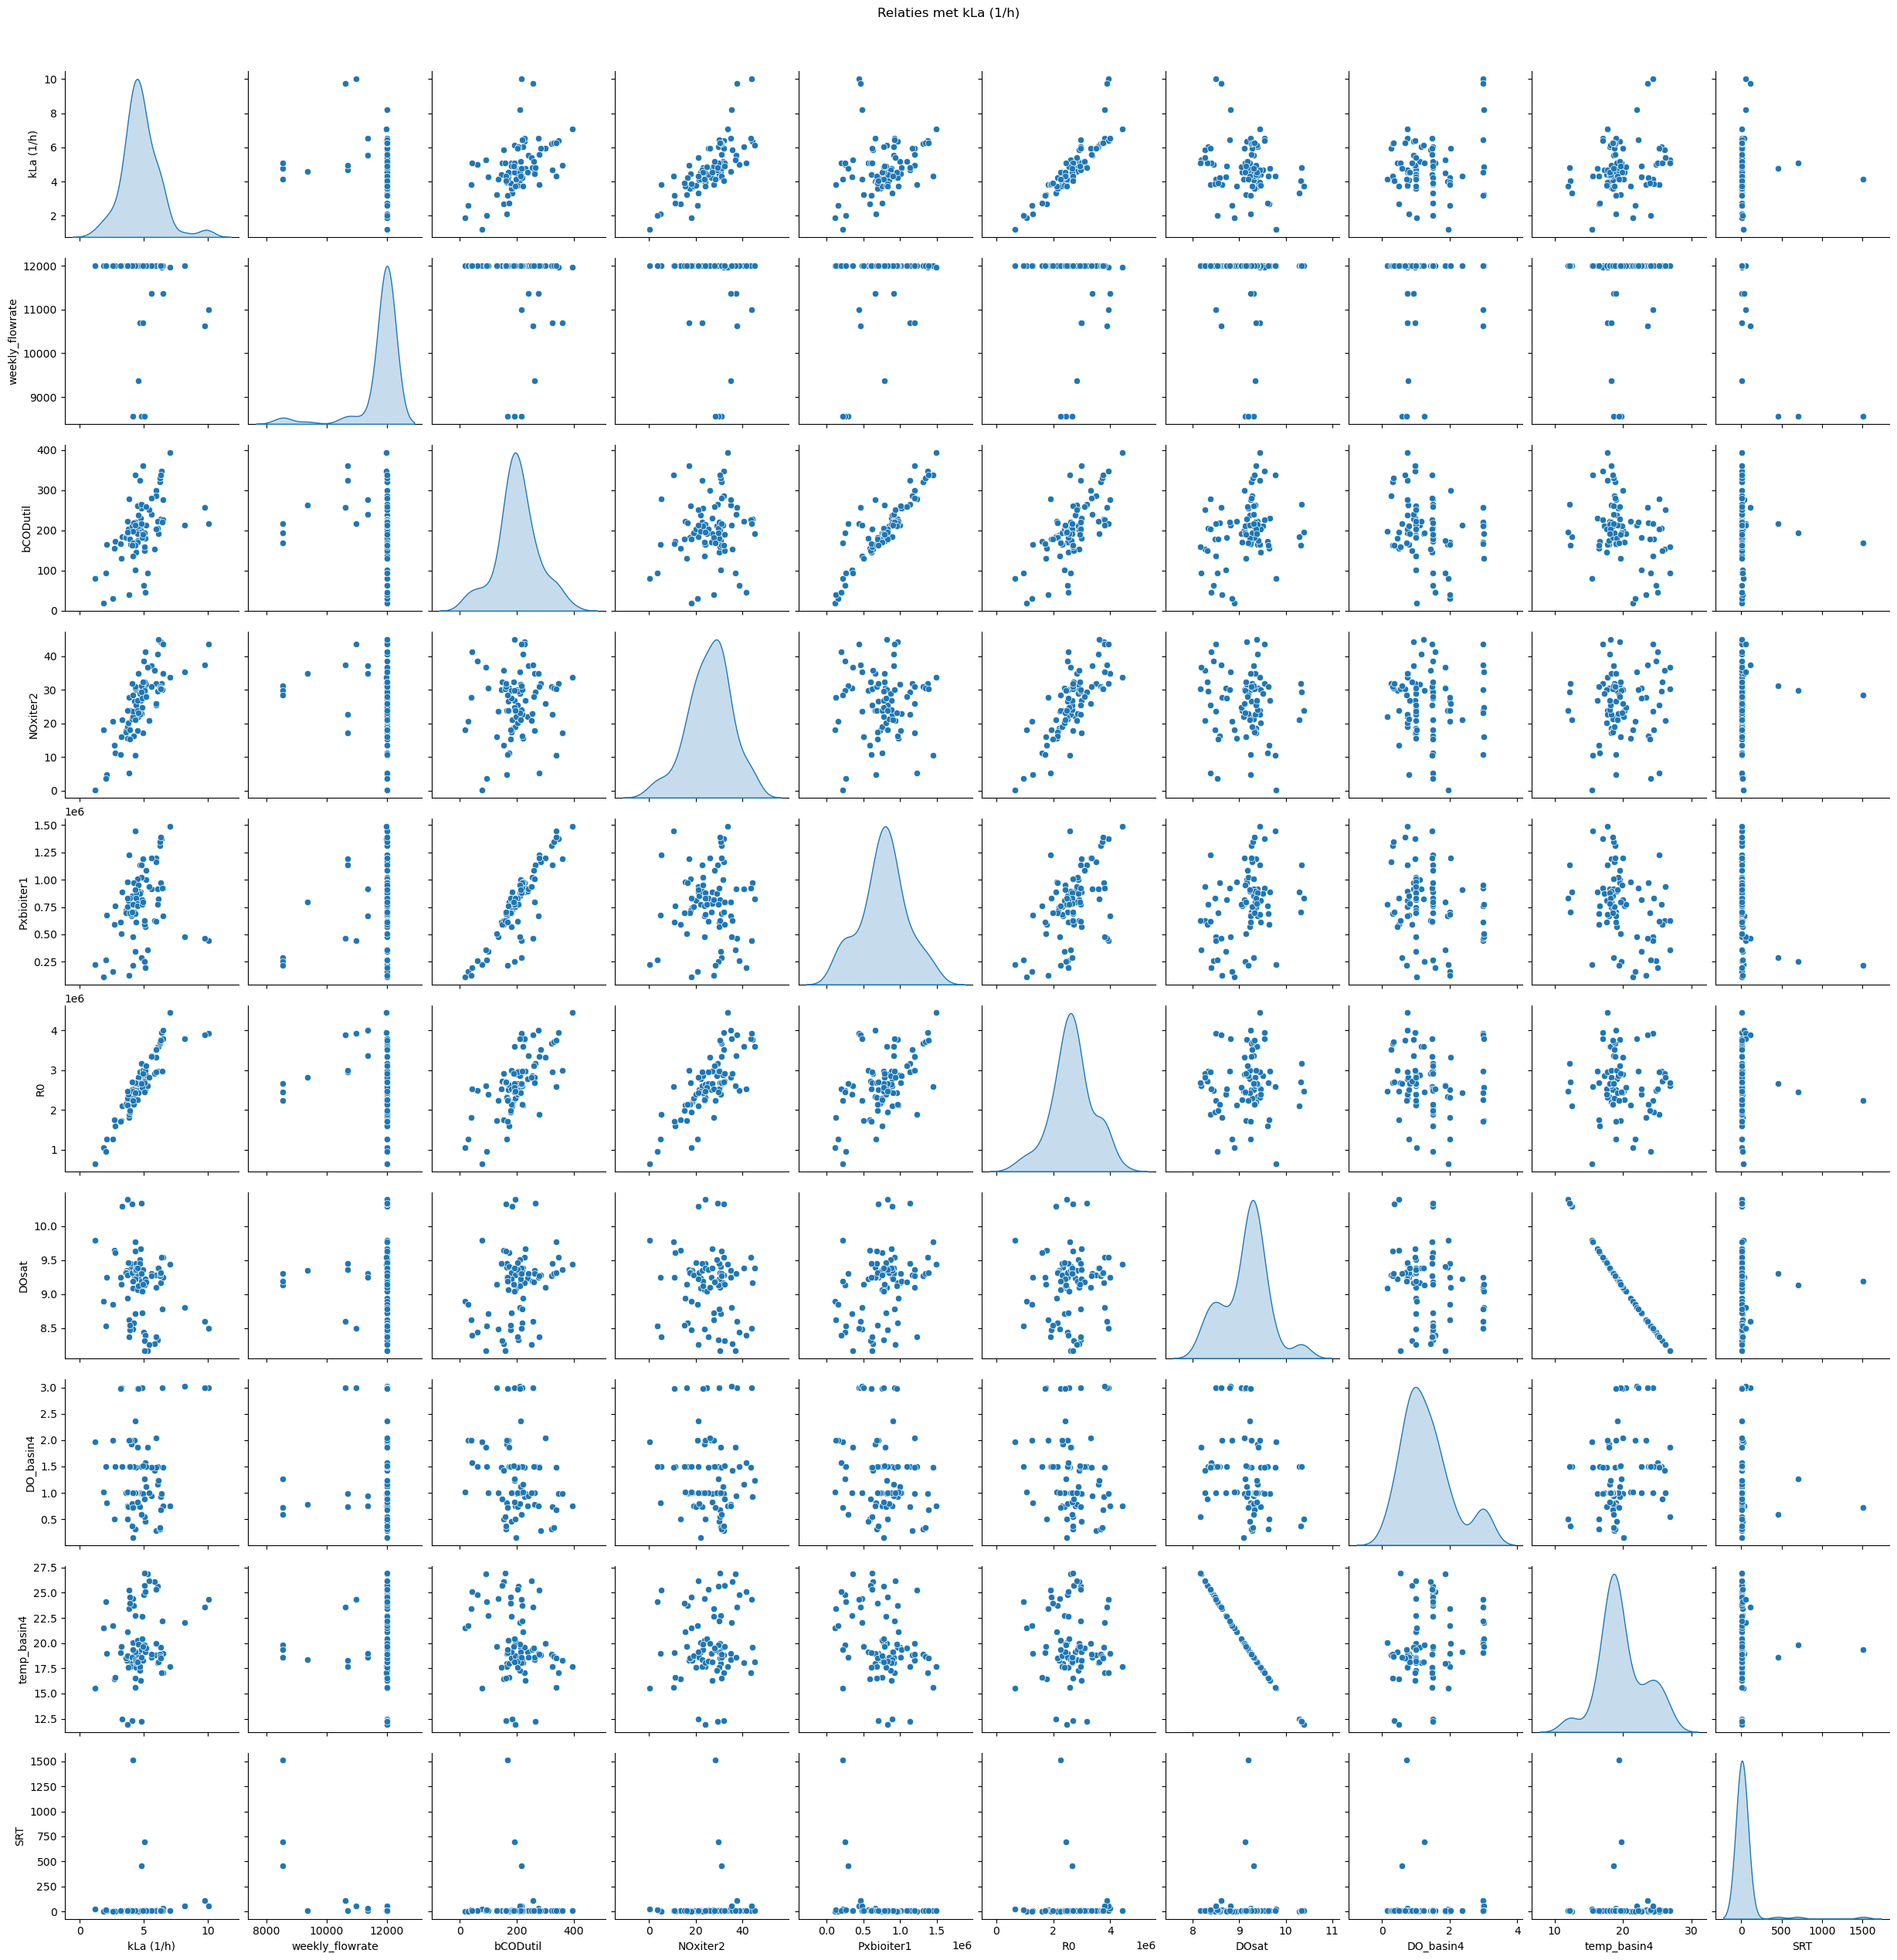


--- Correlatie met kLa/h ---


kLa (1/h)          1.000000
R0                 0.899070
NOxiter2           0.756532
bCODutil           0.498618
Pxbioiter1         0.275400
temp_basin4        0.227184
DO_basin4          0.165617
SRT                0.009753
weekly_flowrate   -0.144632
DOsat             -0.229114
Name: kLa (1/h), dtype: float64

In [159]:
import seaborn as sns

# === 1. Detecteer uitschieters in kLa/h ===
boven_drempel = merged_df['kLa (1/h)'].quantile(0.95)
onder_drempel = merged_df['kLa (1/h)'].quantile(0.05)

hoog = merged_df[merged_df['kLa (1/h)'] > boven_drempel]
laag = merged_df[merged_df['kLa (1/h)'] < onder_drempel]

print(f"Aantal hoge waarden: {len(hoog)}")
print(f"Aantal lage waarden: {len(laag)}")

# === 2. Vergelijk inputvariabelen ===
columns_to_check = [
    'weekly_flowrate', 'bCODutil', 'NOxiter2', 'Pxbioiter1',
    'R0', 'DOsat', 'DO_basin4', 'temp_basin4', 'SRT'
]

vergelijking = pd.DataFrame({
    'Gemiddeld_hoog': hoog[columns_to_check].mean(),
    'Gemiddeld_laag': laag[columns_to_check].mean(),
    'Ratio_hoog/laag': hoog[columns_to_check].mean() / laag[columns_to_check].mean()
})

print("\n--- Vergelijking van invoervariabelen ---")
display(vergelijking)

# === 3. Scatterplots om visuele relaties te zien ===
sns.pairplot(merged_df, vars=['kLa (1/h)'] + columns_to_check, diag_kind='kde')
plt.suptitle("Relaties met kLa (1/h)", y=1.02)
plt.show()

# === 4. Correlatiematrix ===
correlaties = merged_df[columns_to_check + ['kLa (1/h)']].corr()['kLa (1/h)'].sort_values(ascending=False)

print("\n--- Correlatie met kLa/h ---")
display(correlaties)


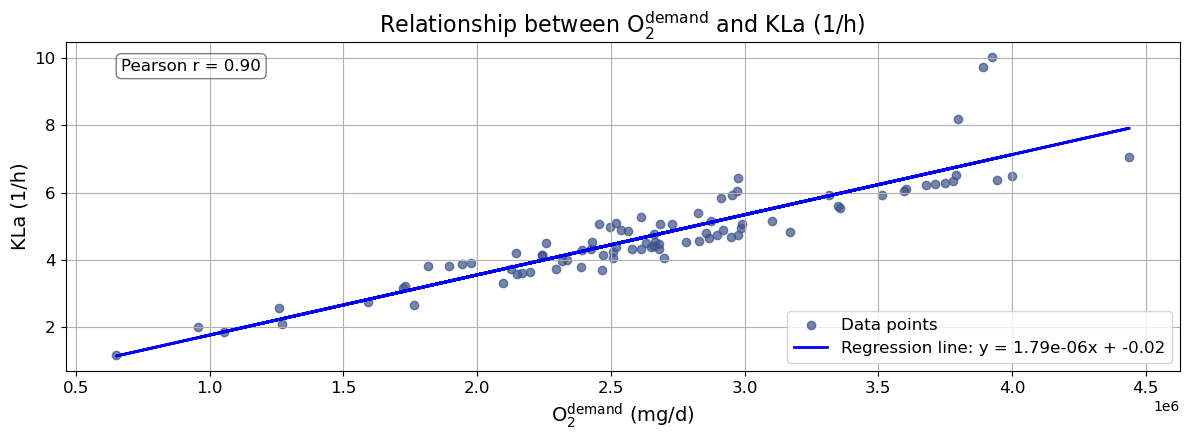

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Verwijder NaNs of infs
clean_df = merged_df[['R0', 'kLa (1/h)']].replace([np.inf, -np.inf], np.nan).dropna()
x = clean_df['R0']
y = clean_df['kLa (1/h)']

# Lineaire regressie
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept

# Correlatiecoëfficiënt
r, p_value = pearsonr(x, y)

# Plotten
plt.figure(figsize=(12, 4.5))
plt.scatter(x, y, color=viridis(1), alpha=0.7, label='Data points')
plt.plot(x, regression_line, color='blue', linewidth=2, label=f'Regression line: y = {slope:.2e}x + {intercept:.2f}')
plt.text(0.05, 0.95, f'Pearson r = {r:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.xlabel(r'$\mathrm{O_2^{demand}}$ (mg/d)', fontsize=14)
plt.ylabel('KLa (1/h)', fontsize=14)
plt.title(r"Relationship between $\mathrm{O_2^{demand}}$ and KLa (1/h)", fontsize=16)

plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("O2_demand_vs_KLa.pdf", format='pdf', bbox_inches='tight')
plt.show()

/var/folders/9f/th88wdx51hg0ndwms7rmbwbm0000gn/T/ipykernel_38643/1972712705.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis", 3)


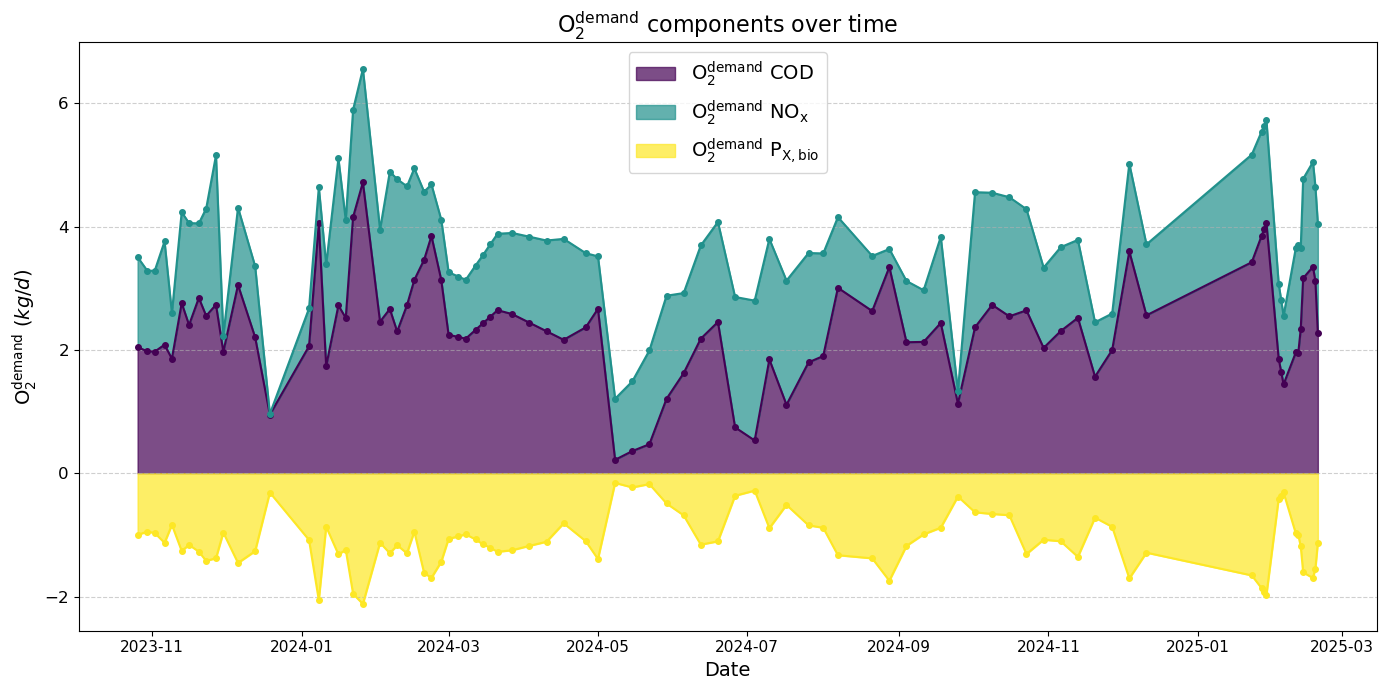

In [161]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

# Filteren op volledige data
filtered_df = merged_df.dropna(subset=['kLa (1/h)'])

# Datum als tijdreeks
x = pd.to_datetime(filtered_df['Date'])

# Componenten (omgezet naar kg/d)
O2_COD = filtered_df['O2-demand-COD'] / 1_000_000
O2_NOx = filtered_df['O2-demand-NOx'] / 1_000_000
O2_Pxbio = filtered_df['O2-demand-Pxbio'] / 1_000_000

# Gestapelde waardes
top_COD = O2_COD
top_NOx = O2_COD + O2_NOx
top_Pxbio = O2_Pxbio

# Kleuren uit viridis colormap
viridis = cm.get_cmap("viridis", 3)
color_cod = viridis(0)
color_nox = viridis(1)
color_pxbio = viridis(2)

# Plotten
plt.figure(figsize=(14, 7))

# COD
plt.fill_between(x, 0, top_COD, color=color_cod, alpha=0.7, label=r"$\mathrm{O_2^{demand}\ COD}$")
plt.plot(x, top_COD, color=color_cod, marker='o', markersize=4, linewidth=1.5)

# NOx
plt.fill_between(x, top_COD, top_NOx, color=color_nox, alpha=0.7, label=r"$\mathrm{O_2^{demand}\ NO_x}$")
plt.plot(x, top_NOx, color=color_nox, marker='o', markersize=4, linewidth=1.5)

# Pxbio
plt.fill_between(x, 0, top_Pxbio, color=color_pxbio, alpha=0.7, label=r"$\mathrm{O_2^{demand}\ P_{X,bio}}$")
plt.plot(x, top_Pxbio, color=color_pxbio, marker='o', markersize=4, linewidth=1.5)

# Opmaak
plt.xlabel("Date", fontsize=14)
plt.ylabel(r"$\mathrm{O_2^{demand}}\ (kg/d)$", fontsize=14)
plt.title(r"$\mathrm{O_2^{demand}}$ components over time", fontsize=16)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=14)
plt.tight_layout()

# Opslaan
plt.savefig("oxygendemandcomponents.pdf", format='pdf', bbox_inches='tight')
plt.show()

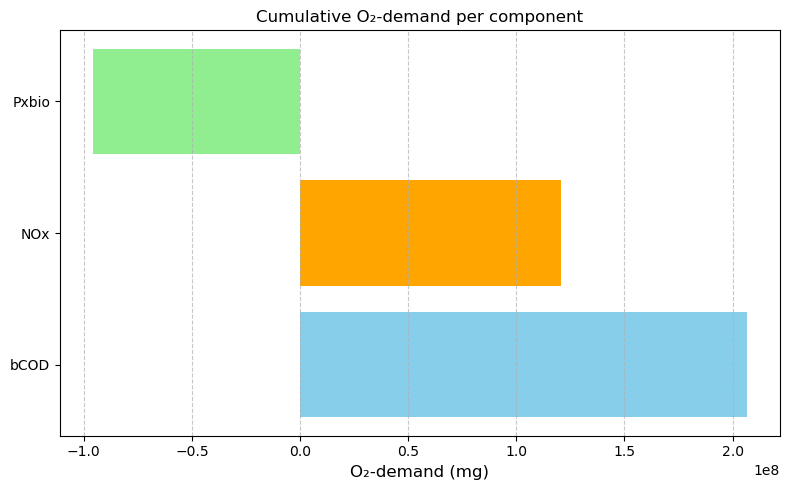

In [162]:
# Sommeer over alle niet-NaN datapunten
total_COD = filtered_df['O2-demand-COD'].sum()
total_NOx = filtered_df['O2-demand-NOx'].sum()
total_Pxbio = filtered_df['O2-demand-Pxbio'].sum()

components = ['bCOD', 'NOx', 'Pxbio']
values = [total_COD, total_NOx, total_Pxbio]

# Barplot
plt.figure(figsize=(8, 5))
colors = ['skyblue', 'orange', 'lightgreen']
plt.barh(components, values, color=colors)
plt.title('Cumulative O₂-demand per component')
plt.xlabel('O₂-demand (mg)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [163]:
# Sommeer totale zuurstofvraag per component
total_COD = filtered_df['O2-demand-COD'].sum()
total_NOx = filtered_df['O2-demand-NOx'].sum()
total_Pxbio = filtered_df['O2-demand-Pxbio'].sum()

# Totale zuurstofvraag (absolute waarde omdat Pxbio negatief is)
total_O2_demand = total_COD + total_NOx + abs(total_Pxbio)

# Bereken gemiddelde procentuele bijdrage
perc_COD = 100 * total_COD / total_O2_demand
perc_NOx = 100 * total_NOx / total_O2_demand
perc_Pxbio = 100 * abs(total_Pxbio) / total_O2_demand

print(f"Gemiddelde procentuele bijdrage aan O₂-vraag:")
print(f"bCOD:  {perc_COD:.1f} %")
print(f"NOx:   {perc_NOx:.1f} %")
print(f"Pxbio: {perc_Pxbio:.1f} %")

Gemiddelde procentuele bijdrage aan O₂-vraag:
bCOD:  48.8 %
NOx:   28.5 %
Pxbio: 22.6 %


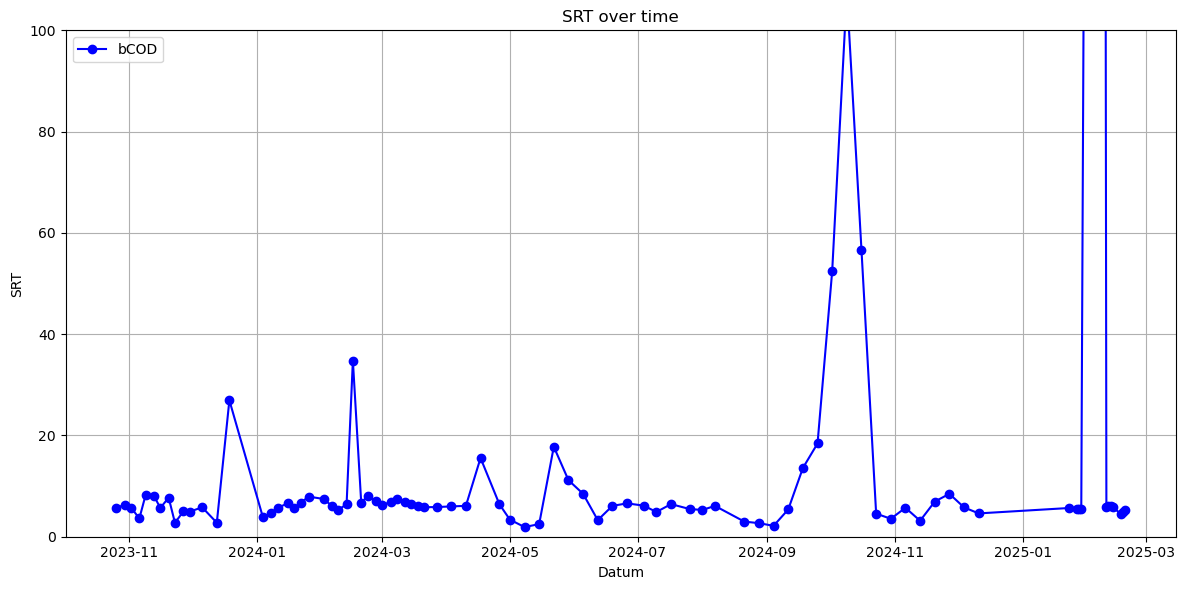

In [164]:
# Zorg dat 'Date' een datetime-object is voor correcte as
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sorteer op datum (indien nodig)
merged_df = merged_df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SRT'], marker='o', linestyle='-', color='blue', label='bCOD')

plt.xlabel('Datum')
plt.ylabel('SRT')
plt.ylim(0,100)
plt.title('SRT over time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [165]:
# Zorg dat 'Date' een datetime-object is
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Filter op de gewenste datum: 5 februari 2025
datum = pd.to_datetime("2025-02-05")
waarde_op_datum = merged_df[merged_df['Date'] == datum]

# Resultaat tonen
print(waarde_op_datum)
print(waarde_op_datum['SRT'])


         Date  temp_basin4  DO_basin4  DO_basin5  weekly_flowrate  \
79 2025-02-05    19.385897   0.723908   2.162079      8559.392505   

    CODtprimeff  CODsprimeff  TNprimeff  NH4primeff  CODseff  ...  \
79        209.5        109.0      33.35        22.8      9.5  ...   

        Henryatm        xg     DOsat        kLa  kLa (1/h)        teller  \
79  40657.307959  0.000005  9.189787  99.349045   4.139544  94285.983198   

         noemer  O2-demand-COD  O2-demand-NOx  O2-demand-Pxbio  
79  22776.90339   1.442900e+06   1.112453e+06    -310995.14048  

[1 rows x 46 columns]
79    1511.092667
Name: SRT, dtype: float64


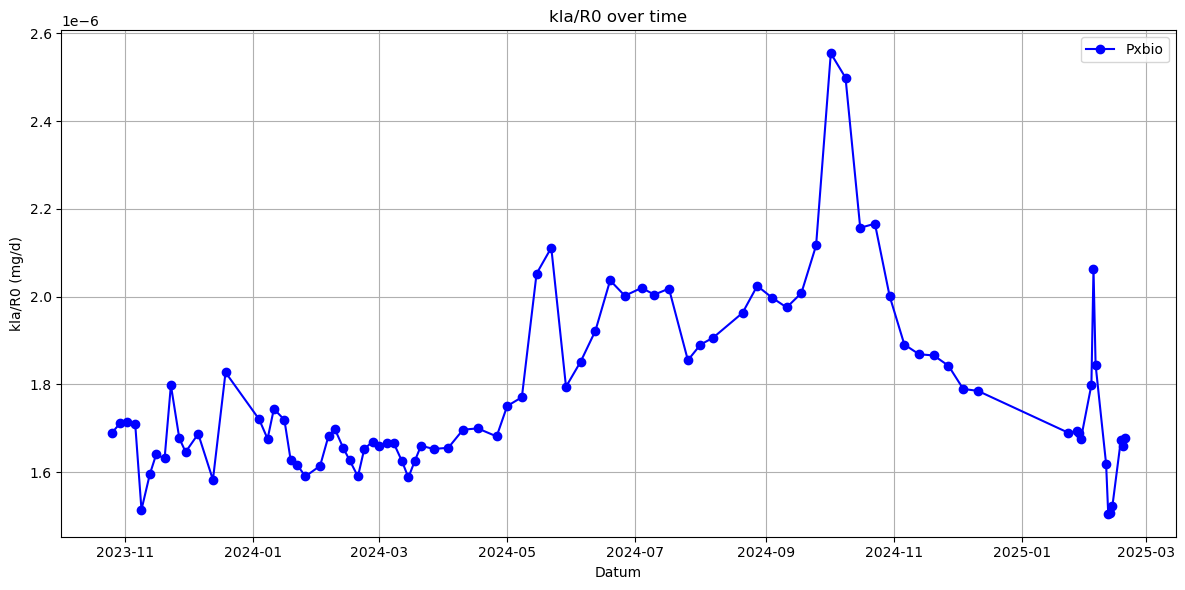

In [166]:
# Zorg dat 'Date' een datetime-object is voor correcte as
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sorteer op datum (indien nodig)
merged_df = merged_df.sort_values('Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['kLa (1/h)']/merged_df['R0'], marker='o', linestyle='-', color='blue', label='Pxbio')

plt.xlabel('Datum')
plt.ylabel('kla/R0 (mg/d)')
plt.title('kla/R0 over time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()